## Boost Charecterization

### Scan I2C Salves 

In [1]:
# Connect to MCP2221
import EasyMCP2221
from time import sleep

# Connect to MCP2221
mcp = EasyMCP2221.Device()

# Optionally configure GP3 to show I2C bus activity.
mcp.set_pin_function(gp3 = "LED_I2C")

print("Searching...")

for addr in range(0, 0x80):
    try:
        mcp.I2C_read(addr)
        print("I2C slave found at address 0x%02X" % (addr))

    except EasyMCP2221.exceptions.NotAckError:
        pass


Searching...
I2C slave found at address 0x18
I2C slave found at address 0x29
I2C slave found at address 0x2D
I2C slave found at address 0x2F


### Meter Setup

In [2]:
from multimeter import mul_34401A

meter = mul_34401A('GPIB0::25::INSTR')
print(meter.meas_V())


5.0535494


### Boost Voltage measurement

In [3]:
import pandas as pd 
from time import sleep
def ADC_Vbus_Value(ADCAddr=0x29):
    BoostADC = mcp.I2C_Slave(ADCAddr)
    BoostADC.write([0x0B,0x5C])
    Vsense_LSB = int.from_bytes(BoostADC.read_register(0x0D),'little') # LSB of the ADC value 
    Vsense_MSB = int.from_bytes(BoostADC.read_register(0x11),'little') # LSB of the ADC value 
    FSV = (40 - 40/2047) 
    Vsense = ((Vsense_MSB << 8 ) | Vsense_LSB) >> 5 
    Vbus = FSV*Vsense / 2047
    return Vbus
    
BoostPOTAddr = 0x2D
BoostADCAddr = 0x18 
BoostPOT = mcp.I2C_Slave(BoostPOTAddr)
# initialize ADC 
# write in 0x0b register 0x56 for the channel 1 configuration
potCode = []
ADC = []
mulMeter = []
diff = []
# for code in range(0,0x66):
#     BoostPOT.write([0x2,code])
#     mulMeter.append(meter.meas_V())
#     ADC.append(ADC_Vbus_Value(BoostADCAddr))
#     potCode.append(code)
#     diff.append(mulMeter[-1] - ADC[-1])
#     print(f'code :{potCode[-1]} meterValue:{mulMeter[-1]}V ADC:{ADC[-1]}V difference:{diff[-1]}')
#     sleep(0.3)
# data = pd.DataFrame([mulMeter,ADC,diff,potCode]).T
# columns = {col:newcol for col,newcol in zip(data.columns.to_list(),['meterVoltage','ADCVoltage','Difference','potCode'] )}
# data.rename(columns=columns).to_excel('VBIAS_Boost1.xlsx')
    

In [12]:
BoostPOT.write([0x2,0x46])

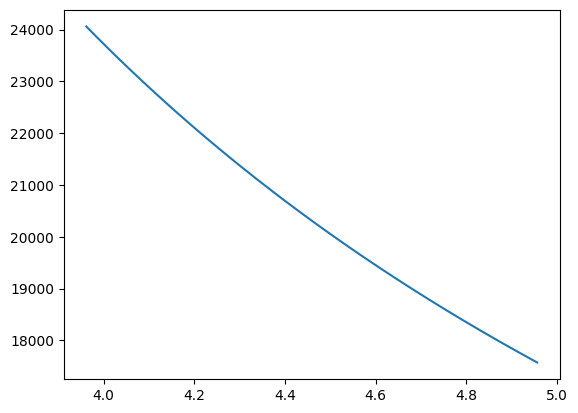

In [8]:
import matplotlib.pyplot as plt 

r1=51*10**3
r2 = []
vout = []
for i in range(0x46,0x66):
    BoostPOT.write([0x2,i])
    vout.append(meter.meas_V())
    r2.append(r1/((vout[-1]/1.27 -1)))
    sleep(0.1)

plt.plot(vout,r2)
data = pd.DataFrame([vout,r2]).T
columns = {col:newcol for col,newcol in zip(data.columns.to_list(),['Vout','r2'] )}
data.rename(columns=columns).to_excel('r2.xlsx')

In [38]:
import struct
int.from_bytes(b'\xff','big')

255

In [2]:
import pyvisa as visa 

rm = visa.ResourceManager()
rm.list_resources()

('ASRL3::INSTR',
 'ASRL4::INSTR',
 'ASRL5::INSTR',
 'ASRL6::INSTR',
 'ASRL10::INSTR',
 'ASRL15::INSTR',
 'GPIB0::25::INSTR')